<a href="https://colab.research.google.com/github/gabopotestades/genre_classifier/blob/main/ft_genre_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
[1]	https://www.oxfordmusiconline.com/view/10.1093/gmo/9781561592630.001.0001/omo-9781561592630-e-0000040599;jsessionid=3A6113DCE6DCDD3D2F2CB044D5A01A9C

[2] https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2728368.pdf

[3] https://genius.com/Genius-tags-music-genres-international-annotated

[4] https://arxiv.org/pdf/1607.01759.pdf

[5] https://medium.com/@mariamestre/fasttext-stepping-through-the-code-259996d6ebc4

[6] https://austingwalters.com/fasttext-for-sentence-classification/


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
directory = '/content/drive/MyDrive/11-Natural Language Processing/MP'

In [ ]:
# Install needed packages
!pip install git+https://github.com/johnwmillr/LyricsGenius.git
!pip install fasttext

In [ ]:
# Import installed packages
import re
import os
import nltk
import requests
import fasttext
nltk.download('wordnet')
import lyricsgenius as lg
from pathlib import Path
from bs4 import BeautifulSoup
from collections import Counter
from IPython.display import clear_output

from nltk.stem import WordNetLemmatizer
fasttext.FastText.eprint = lambda x: None
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Access the API using a private token
genius = lg.Genius('Genius token here')

# Save lyrics per genre to produce the dataset
genres = ['alternative-rock', 'art-rock', 'art-pop', 'dance-pop', 'death-metal', 'edm', 'emo', 'folk', 'grunge', 'funk', 'rock', 'gothic-rock', 'heavy-metal', 'hip-hop', 'industrial', 'indie-pop', 'indie-rock', 'psychedelic', 'punk-rock', 
'soul', 'glitch', 'jazz', 'krautrock', 'lo-fi', 'metalcore', 'neofolk', 'neo-psychedelia', 'new-wave', 'post-punk', 'pop-country', 'house', 'math-rock',
'no-wave', 'noise', 'pop-punk', 'pop-rock', 'reggae', 'shoegaze', 'synth-pop', 'vaporwave', 'pop', 'r-b', 'country', 'rap']

# Load the model 
genres_model = fasttext.load_model(f'{directory}/multi_label_models/multi_label_model_epoch_lr_ngrams_hsmax.bin')

In [ ]:
def format_text(text_to_format):

    stemmer = WordNetLemmatizer()
    
    song_lyrics = re.sub('\[[:a-zA-Z0-9 ]+\]', '', text_to_format)
    song_lyrics = re.sub('EmbedShare URLCopyEmbedCopy', '', song_lyrics)
    song_lyrics = re.sub('[^a-zA-Z ]', ' ', song_lyrics)
    song_lyrics = ' '.join( [w for w in song_lyrics.split() if len(w)>1] )
    song_lyrics = song_lyrics.replace(r'\r', ' ')
    song_lyrics = song_lyrics.replace(r'\t', ' ')
    song_lyrics = song_lyrics.replace(r'\n', ' ')
    song_lyrics = re.sub('\\s+', ' ', song_lyrics)
    song_lyrics = song_lyrics.lower()
    
    # Lemmatize each word to get root words
    song_lyrics = song_lyrics.split()
    song_lyrics = [stemmer.lemmatize(word) for word in song_lyrics]
    song_lyrics = ' '.join(song_lyrics)

    return song_lyrics

In [ ]:
def get_labels(song_url):

  page = requests.get(song_url).text
  data = re.search(r',\\\"tags\\":\[\{([^\]])*\],', page).group(0)
  data = re.findall(r'\\\"name\\":\\"([-&a-zA-z]*)\\"', data)

  labels_list = []
  
  for label in data:
    genre_label = label.strip().lower()
    genre_label = genre_label.replace(" ", "-")
    
    genre_label = f'__label__{genre_label}'
    labels_list.append(genre_label)

  return (" ").join(labels_list)

In [ ]:
def get_song_genres(song_name, artist = ""):
  
  song = genius.search_song(song_name, artist)

  if song:

    lyrics = format_text(song.lyrics)
    result = genres_model.predict(lyrics, k=4)
    clear_output()

    print(f'\nSong Title: {song.title}')
    print(f'Song Artist: {song.artist}')

    print('\nModel genres:\n')
    for x in range(len(result[0])):
      genre = result[0][x].replace('__label__', '').capitalize()
      print(f'{genre}: {result[1][x]}')

    print('\n\nActual genres:\n')
    page = requests.get(song.url).text
    # data = re.search(r',\\\"tags\\":\[\{([^\]])*\],', page).group(0)
    # data = re.findall(r'\\\"name\\":\\"([-&a-zA-z]*)\\"', data)
    data = re.findall(r'false,&quot;url&quot;:&quot;https://genius.com/tags/([^&]+)', page)

    for label in data:
      genre_label = label.replace(" ", "-").capitalize()
      print(genre_label)

    print('\n' + ('=' * 100) + '\n')

  else:
    print('No song found in Genius database')

In [ ]:
# Access the API using a private token
genius = lg.Genius('Lc04bYyX-frIVFjz37NZokFsR71t6xL-CgZvOvkT3NgutLWnsNmHuAnxhqSduTPf')

# Save lyrics per genre to produce the dataset
genres = ['alternative-rock', 'art-rock', 'art-pop', 'dance-pop', 'death-metal', 'edm', 'emo', 'folk', 'grunge', 'funk', 'rock', 'gothic-rock', 'heavy-metal', 'hip-hop', 'industrial', 'indie-pop', 'indie-rock', 'psychedelic', 'punk-rock', 
'soul', 'glitch', 'jazz', 'krautrock', 'lo-fi', 'metalcore', 'neofolk', 'neo-psychedelia', 'new-wave', 'post-punk', 'pop-country', 'house', 'math-rock',
'no-wave', 'noise', 'pop-punk', 'pop-rock', 'reggae', 'shoegaze', 'synth-pop', 'vaporwave', 'pop', 'r-b', 'country', 'rap']

# Loop through all genres
for genre in genres:

  Path(f"{directory}/genres/{genre}").mkdir(parents=True, exist_ok=True)

  page = 1

  while page:

    result = genius.tag(genre, page=page)

    if not result:
      page = None
      pass

    for hit in result['hits']:

      try:

        # Format lyrics
        song_lyrics = genius.lyrics(song_url=hit['url'])
        song_lyrics = format_text(song_lyrics)
      
        labels = get_labels(hit['url'])
        if labels:
          song_lyrics = labels + " " + song_lyrics
        else:
          song_lyrics = f'__label__{genre} ' + song_lyrics

        # Format the filename
        file_title = re.sub('[^a-zA-Z0-9 \n\.]', '', hit['title_with_artists'])
        file_name = f'{directory}/genres/{genre}/{file_title}.txt'

        # Save the lyrics to a text file
        open(file_name, 'w+').close()
        file = open(file_name, 'w+')
        file.write(song_lyrics)
        file.close()

      except Exception as e: 
        # print(e)
        # raise Exception
        pass

    page = result['next_page']



In [ ]:
# Create a list of all the lyrics that were retrieved
all_lyrics_data = []

for genre in genres:

  print(genre)
  for filename in os.listdir(f'{directory}/genres/{genre}'):

    text_file_name = f'{directory}/genres/{genre}/{filename}'
    text_file = open(text_file_name, 'r')
    song_lyrics = text_file.read()
    text_file.close()

    all_lyrics_data.append(song_lyrics)

In [ ]:
# Split the list into a training (70%) and test (30%)

data = train_test_split(all_lyrics_data, test_size=0.3, shuffle=True)
train_data = data[0]
test_data = data[1]

In [ ]:
# Save training and test data to text files
train_file_name = f'{directory}/train.txt'
open(train_file_name, 'w+').close()
train_file = open(train_file_name, 'w+')
train_data_to_text = '\n'.join(train_data)
train_file.write(train_data_to_text)
train_file.close()

test_file_name = f'{directory}/test.txt'
open(test_file_name, 'w+').close()
test_file = open(test_file_name, 'w+')
test_data_to_text = '\n'.join(test_data)
test_file.write(test_data_to_text)
test_file.close()

In [ ]:
# Get the genre frequency count for single and multiple

train_file_name = f'{directory}/train_multi_label.txt'
text_file = open(train_file_name, 'r')
song_lyrics = text_file.read()
song_lyrics = song_lyrics.splitlines()
genres_list = []

for song in song_lyrics:
  matches = re.findall('__label__([-&a-zA-Z0-9]+)', song)
  for match in matches:
    genres_list.append(match)

genres_dict = dict(Counter(genres_list))
ordered_dict = {k: v for k, v in sorted(genres_dict.items(), key=lambda item: item[1])}
total = 0
total_genres = 0
for genre in ordered_dict:
  print(f'{genre}: {ordered_dict[genre]}')
  total += ordered_dict[genre]
  total_genres += 1

print(total)
print(total_genres)

In [ ]:
# Single label, with epoch, learning rate and n-grams

# train_file_name = f'{directory}/train_single_label.txt'
# model = fasttext.train_supervised(input=train_file_name, epoch=40, lr=0.1, wordNgrams=1)
# model.save_model(f'{directory}/single_label_models/single_label_model_epoch_lr_ngrams.bin')

test_file_name = f'{directory}/test_single_label.txt'
test_model = fasttext.load_model(f'{directory}/single_label_models/single_label_model_epoch_lr_ngrams.bin')
prediction = test_model.test(test_file_name)

precision = prediction[1]
recall = prediction[2]
f1_score = (2 * ( (precision * recall) / (precision + recall) ))

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}' )

Precision: 0.17740409879138203
Recall: 0.17740409879138203
F1 Score: 0.17740409879138203


In [ ]:
# Multiple labels, with epoch, learning rate, ngrams and hsmax

train_file_name = f'{directory}/train_multi_label.txt'
model = fasttext.train_supervised(input=train_file_name, loss='ova', epoch=50, lr=0.2, wordNgrams=3, bucket=200000, dim=50)
model.save_model(f'{directory}/multi_label_models/multi_label_model_epoch_lr_ngrams_hsmax.bin')

test_file_name = f'{directory}/test_multi_label.txt'
test_model = fasttext.load_model(f'{directory}/multi_label_models/multi_label_model_epoch_lr_ngrams_hsmax.bin')
prediction = test_model.test(test_file_name, k=4)

precision = prediction[1]
recall = prediction[2]
f1_score = (2 * ( (precision * recall) / (precision + recall) ))

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}' )

Precision: 0.5487907465825447
Recall: 0.5456636520466308
F1 Score: 0.5472227319195785


In [ ]:
# Train single label different epochs and wordNgrams

current_epoch_single = 10

train_file_name = f'{directory}/train_single_label.txt'
test_file_name = f'{directory}/test_single_label.txt'

results_per_run_single = []

learning_rate_single = 0.1

while current_epoch_single <= 50:

  current_ngrams_single = 1

  while current_ngrams_single <= 5:

    model = fasttext.train_supervised(input=train_file_name, epoch=current_epoch_single, lr=learning_rate_single, wordNgrams=current_ngrams_single)
    model.save_model(f'{directory}/single_label_models/single_label_model_epoch_lr_ngrams_test.bin')
    test_model = fasttext.load_model(f'{directory}/single_label_models/single_label_model_epoch_lr_ngrams_test.bin')
    test_results_single =  test_model.test(test_file_name)
    results_per_run_single.append([learning_rate_single, current_epoch_single, current_ngrams_single, test_results_single[1], test_results_single[2]])

    current_ngrams_single += 1

  current_epoch_single += 10

for res in results_per_run_single:
  print(res)

In [ ]:
# Train multi label different epochs and wordNgrams

current_epoch = 10

train_file_name = f'{directory}/train_multi_label.txt'
test_file_name = f'{directory}/test_multi_label.txt'

results_per_run = []
learning_rate_multi = 0.1

while current_epoch <= 50:

  current_ngrams = 1

  while current_ngrams <= 5:

    model = fasttext.train_supervised(input=train_file_name, loss='ova', epoch=current_epoch, lr=learning_rate_multi, wordNgrams=current_ngrams, bucket=200000, dim=50)
    model.save_model(f'{directory}/multi_label_models/multi_label_model_epoch_lr_ngrams_hsmax_test.bin')
    test_model = fasttext.load_model(f'{directory}/multi_label_models/multi_label_model_epoch_lr_ngrams_hsmax_test.bin')
    test_results =  test_model.test(test_file_name, k=4)
    results_per_run.append([learning_rate_multi, current_epoch, current_ngrams, test_results[1], test_results[2]])

    current_ngrams += 1

  current_epoch += 10

for res in results_per_run:
  print(res)


In [ ]:
# Getting the average labels in a song lyrics

train_file_name = f'{directory}/test_multi_label.txt'
text_file = open(train_file_name, 'r')
song_lyrics = text_file.read()
song_lyrics = song_lyrics.splitlines()

total_labels = 0
total_songs = 0

for song in song_lyrics:

  matches = re.findall('__label__([-&a-zA-Z0-9]+) ', song)
  
  total_labels += len(matches)
  total_songs += 1

print(total_labels / total_songs)

4.025026288117771


In [ ]:
# Create confusion matrix for single labelled
model = fasttext.load_model(f'{directory}/single_label_models/single_label_model_epoch_lr_ngrams.bin')

train_file_name = f'{directory}/test_single_label.txt'
text_file = open(train_file_name, 'r')
song_lyrics = text_file.read()
song_lyrics = song_lyrics.splitlines()

y_true = []
y_preds = []
display = ['indie-rock','art-pop', 'punk-rock', 'pop-punk', 'synth-pop']

for song in song_lyrics:

  matches = re.findall('__label__([-&a-zA-Z0-9]+)', song)
  
  song_formatted = re.sub(r'__label__([-&a-zA-Z0-9]+)', '', song)
  song_formatted = re.sub('\\s+', ' ', song_formatted)

  predicted_genres = model.predict(song_formatted, k=1)

  if matches and \
     matches[0] in display and \
     predicted_genres[0][0].replace('__label__', '') in display:

    y_true.append(matches[0])
    y_preds.append(predicted_genres[0][0].replace('__label__', ''))

cm = confusion_matrix(y_true, y_preds, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=display)
cmd.plot()

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

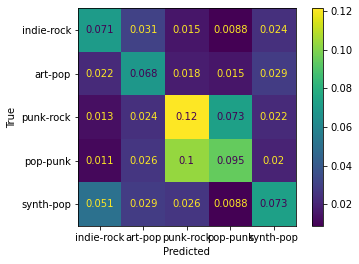

In [ ]:
# Create confusion matrix for single label
model = fasttext.load_model(f'{directory}/single_label_models/single_label_model_epoch_lr_ngrams.bin')

train_file_name = f'{directory}/test_single_label.txt'
text_file = open(train_file_name, 'r')
song_lyrics = text_file.read()
song_lyrics = song_lyrics.splitlines()

y_true = []
y_preds = []
display = ['indie-rock','art-pop', 'punk-rock', 'pop-punk', 'synth-pop']

for song in song_lyrics:

  matches = re.findall('__label__([-&a-zA-Z0-9]+)', song)
  
  song_formatted = re.sub(r'__label__([-&a-zA-Z0-9]+)', '', song)
  song_formatted = re.sub('\\s+', ' ', song_formatted)

  predicted_genres = model.predict(song_formatted, k=1)

  if matches and \
     matches[0] in display and \
     predicted_genres[0][0].replace('__label__', '') in display:

    y_true.append(matches[0])
    y_preds.append(predicted_genres[0][0].replace('__label__', ''))

cm = confusion_matrix(y_true, y_preds, normalize="all")
cmd = ConfusionMatrixDisplay(cm, display_labels=display)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

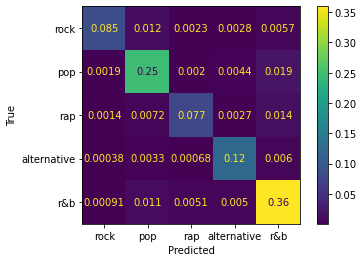

In [ ]:
# Create confusion matrix for multiple labels
model = fasttext.load_model(f'{directory}/multi_label_models/multi_label_model_epoch_lr_ngrams_hsmax.bin')

train_file_name = f'{directory}/test_multi_label.txt'
text_file = open(train_file_name, 'r')
song_lyrics = text_file.read()
song_lyrics = song_lyrics.splitlines()

y_true = []
y_preds = []
labels = ['rock', 'pop', 'rap', 'alternative', 'r&b']

i = 10

for song in song_lyrics:

  matches = re.findall('__label__([-&a-zA-Z0-9]+)', song)
  
  song_formatted = re.sub(r'__label__([-&a-zA-Z0-9]+)', '', song)
  song_formatted = re.sub('\\s+', ' ', song_formatted)

  predicted_genres = model.predict(song_formatted, k=len(matches))
  predicted_genres = [x.replace('__label__', '') for x in predicted_genres[0]]

  if matches:

    y_true_filtered = [x for x in matches if x in labels]
    y_preds_filtered = [x for x in predicted_genres if x in labels]

    intersecting_genres = list(set(y_true_filtered).intersection(y_preds_filtered))

    for genre in intersecting_genres:
      y_true.append(genre)
      y_preds.append(genre)

      y_true_filtered.remove(genre)
      y_preds_filtered.remove(genre)

    if len(y_true_filtered) > len(y_preds_filtered):

      elements_to_remove = len(y_true_filtered) - len(y_preds_filtered)
      y_true_filtered = y_true_filtered[:len(y_true_filtered)-elements_to_remove]
      
    elif len(y_preds_filtered) > len(y_true_filtered):

      elements_to_remove = len(y_preds_filtered) - len(y_true_filtered)
      y_preds_filtered = y_preds_filtered[:len(y_preds_filtered)-elements_to_remove]

    y_true_filtered.sort()
    y_preds_filtered.sort()

    for item in y_true_filtered:
      y_true.append(item)
    
    for item in y_preds_filtered:
      y_preds.append(item)


cm = confusion_matrix(y_true, y_preds, normalize="all")
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
# Compute accuracy for the single label model
model = fasttext.load_model(f'{directory}/single_label_models/single_label_model_epoch_lr_ngrams.bin')

train_file_name = f'{directory}/test_single_label.txt'
text_file = open(train_file_name, 'r')
song_lyrics = text_file.read()
song_lyrics = song_lyrics.splitlines()

total_correct = 0
total = 0

for song in song_lyrics:

  total += 1

  matches = re.findall('__label__([-&a-zA-Z0-9]+)', song)
  
  song_formatted = re.sub(r'__label__([-&a-zA-Z0-9]+)', '', song)
  song_formatted = re.sub('\\s+', ' ', song_formatted)

  predicted_genres = model.predict(song_formatted, k=1)

  if matches:
    if matches[0] == predicted_genres[0][0].replace('__label__', ''):
      total_correct += 1
  
print(total_correct / total)

In [ ]:
# Compute accuracy for the multiple label model
model = fasttext.load_model(f'{directory}/multi_label_models/multi_label_model_epoch_lr_ngrams_hsmax.bin')

train_file_name = f'{directory}/test_multi_label.txt'
text_file = open(train_file_name, 'r')
song_lyrics = text_file.read()
song_lyrics = song_lyrics.splitlines()

total_correct = 0
total = 0

for song in song_lyrics:

  matches = re.findall('__label__([-&a-zA-Z0-9]+)', song)
  
  song_formatted = re.sub(r'__label__([-&a-zA-Z0-9]+)', '', song)
  song_formatted = re.sub('\\s+', ' ', song_formatted)
  predicted_genres = model.predict(song_formatted, k=4)

  if matches:
    total += len(matches)
    for genre in predicted_genres[0]:
      if genre.replace('__label__', '') in matches:
        total_correct += 1

print(total_correct / total)

0.5453785464235331


In [ ]:
# Getting the lyrics frequency for a genre

genre = 'rock'

train_file_name = f'{directory}/train_multi_label.txt'
text_file = open(train_file_name, 'r')
song_lyrics = text_file.read()
song_lyrics = song_lyrics.splitlines()
words_list = []

for song in song_lyrics:

  matches = re.findall('__label__([-&a-zA-Z0-9]+)', song)
  
  song_formatted = re.sub(r'__label__([-&a-zA-Z0-9]+)', '', song)
  song_formatted = re.sub('\\s+', ' ', song_formatted)
  
  if genre in matches:
    song_formatted = song_formatted.split()
    
    for word in song_formatted:
      words_list.append(word)

words_dict = dict(Counter(words_list))
ordered_dict = {k: v for k, v in sorted(words_dict.items(), key=lambda item: item[1])}

for word in ordered_dict:
  
  if word not in stopwords.words('english'):
    print(f'{word}: {ordered_dict[word]}')



In [ ]:
song_title = input('Enter a song title: ')
artist = input('Enter the artist (optional): ')

get_song_genres(song_title, artist)

In [ ]:
get_song_genres('big strong boss', 'swans')


Song Title: Big Strong Boss
Song Artist: Swans

Model genres:

Rock: 0.9990402460098267
Post-punk: 0.9928885698318481
Industrial: 0.9855064153671265
Art-punk: 0.031153826043009758


Actual genres:

Post-punk
Industrial
Noise-rock
No-wave




In [ ]:
get_song_genres('when you sleep', 'my bloody valentine')


Song Title: When You Sleep
Song Artist: ​my bloody valentine

Model genres:

Shoegaze: 0.9688661694526672
Rock: 0.9304682612419128
Ireland: 0.7981967926025391
Ambient: 0.22816647589206696


Actual genres:

Noise-rock
Alternative-rock
Ireland
Noise-pop
Dream-pop
Shoegaze




In [ ]:
get_song_genres('sugar', 'brockhampton')

In [ ]:
get_song_genres('xs', 'rina sawayama')

In [ ]:
get_song_genres('another one bites the dust', 'queen')

In [ ]:
get_song_genres('nothing is safe', '.clipping')

In [ ]:
get_song_genres('shine on you crazy diamond', 'pink floyd')

In [ ]:
get_song_genres('pagtingin', 'ben&ben')


Song Title: Pagtingin
Song Artist: Ben&Ben

Model genres:

Pop: 0.9886782765388489
Ballad: 0.8479777574539185
Filipino: 0.523430347442627
Rock: 0.4378334879875183


Actual genres:

Contemporary-folk
Folk-rock
Folk
Alternative
Alternative-pop
Indie-pop
Indie
Filipino




In [ ]:
get_song_genres('say so', 'doja cat')


Song Title: Say So
Song Artist: Doja Cat

Model genres:

Pop: 0.9964163899421692
Funk: 0.91965252161026
Funk-pop: 0.6224693655967712
R&b: 0.11921291798353195


Actual genres:





In [ ]:
get_song_genres('teadrop', 'massive attack')


Song Title: Teardrop
Song Artist: Massive Attack

Model genres:

Rock: 0.9845854640007019
Trip-hop: 0.8439050912857056
Downtempo: 0.10088862478733063
Idm: 0.08510905504226685


Actual genres:

Art-pop
Dream-pop
Trip-hop




In [ ]:
get_song_genres('leave the door open', 'silk sonic')

In [ ]:
get_song_genres('dont start now', 'dua lipa')


Song Title: Don’t Start Now
Song Artist: Dua Lipa

Model genres:

Dance: 0.9990989565849304
Dance-pop: 0.9928885698318481
Uk: 0.9867871999740601
Pop: 0.9820237755775452


Actual genres:

Nu-disco
Edm
Electro
House
Dance
Eurodance
Dance-pop
Uk




In [ ]:
get_song_genres('pictures of you', 'the cure')


Song Title: Pictures of You
Song Artist: The Cure

Model genres:

Rock: 0.9697954058647156
Post-punk: 0.7490972280502319
Electronic: 0.027595279738307
Pop-punk: 0.02162533439695835


Actual genres:

Dark-wave
Gothic-rock
Post-punk
Alternative-rock
Dream-pop




In [ ]:
get_song_genres('look at the sky', 'porter robinson')

In [ ]:
get_song_genres('reborn', 'kids see ghosts')


Song Title: Reborn
Song Artist: KIDS SEE GHOSTS

Model genres:

Neo-psychedelia: 0.998142421245575
Pop: 0.9863731861114502
Rap: 0.8962613940238953
Trip-hop: 0.880807101726532


Actual genres:

Neo-psychedelia
Cloud-rap
Art-pop
Trip-hop
Alternative-r-b
Conscious-hip-hop




In [ ]:
get_song_genres('fever aye aye', 'death grips')


Song Title: The Fever (Aye Aye)
Song Artist: Death Grips

Model genres:

Rap: 0.9802908897399902
Trap: 0.5078218579292297
Experimental: 0.1520422399044037
Hip-hop: 0.08036746829748154


Actual genres:

Synth-punk
Abstract-rap
Hardcore-hip-hop
Industrial-hip-hop




In [ ]:
# New songs
get_song_genres('great mass of color', 'deafhaven')


Song Title: Great Mass of Color
Song Artist: Deafheaven

Model genres:

Rock: 0.9124462008476257
Shoegaze: 0.9073222279548645
Pop: 0.10088862478733063
Psychedelic: 0.020342351868748665


Actual genres:

Indie-rock
Alternative-rock
Dream-pop
Shoegaze




In [ ]:
get_song_genres('solar power', 'lorde')

In [ ]:
get_song_genres('violent delights', 'chvrches')


Song Title: Violent Delights
Song Artist: CHVRCHES

Model genres:

Rock: 1.0000100135803223
Emo: 0.9890230894088745
Post-hardcore: 0.91965252161026
Pop-punk: 0.8933194279670715


Actual genres:

Indie-pop
Alternative-pop
Alternative




In [ ]:
get_song_genres('the game', 'denzel curry')


Song Title: The Game
Song Artist: Denzel Curry

Model genres:

Rap: 1.0000100135803223
Hip-hop: 0.9525841474533081
Trap: 0.7931159734725952
Canada: 0.585111141204834


Actual genres:

Conscious-hip-hop
Boom-bap
Hardcore-hip-hop
East-coast


